<h1>ISAT 449 - Emerging Topics in Applied Data Science</h1>
<h2>Using TensorFlow 2.x Keras Layers</h2>
<h3>Building a Dense Neural Network with TensorFlow 2.x Keras</h3>
<p>The previous lesson was just to get you used to the learning environment and the concepts involved in building machine learning models. Now, in this part, let's really see the power and ease of use in builing more sophisticated models with the TensorFlow 2.x implementation of Keras, tf.keras</p>
<h2>Learning Objectives</h2>
<ul>
<li>
Learn how to build a Dense neural networks with TensorFlow 2.x and Keras
</li><li>
Learn different appraches to stacking layers or artificial neurons to build 
multi-layer machine learning models
</li><li>
Construct models for Linear regression and classification
</li><li>
Train the model on NumPy generated data
</li><li>
Create simple datasets for exploring model architectures
</li><li>
Use the model's history to plot the loss and accuracy during training
</li><li>
Check the model's accuracy with your test data
</li>
</ul>
<br>
<h3>Let's import tensorflow and some helper modules</h3>


In [ ]:
#imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.6.0


<h3>Building Dense Models</h3>
<h4>Sequential Model</h4>
<p>In Keras, you assemble layers to build models. A model is (usually) a stack or graph of layers. The most common type of model is a stack of layers: the tf.keras.Sequential
model. Let's use the tf.keras.Sequential model build a simple, fully-connected feed-forward neural network (i.e. multi-layer perceptron) which is also called a Dense neural
network. tf.keras has several ways of building models.
Below we illustrate two of the methods for building neural networks with tf.keras</p>
<h4>Method 1 - Explicitly Creating and Stacking the layers in a Python List</h4>
<p></p>
<h6>Practice Problem 1: Build a Dense Neural Network for Regression</h6>
<p>Let's build a model of a fully-connected feed-forward neural network (i.e. multi-layer perceptron) also called a Dense neural network. The tf.keras Sequential class is used to
implement the feed-forward neural network. We will build a regression model using a Dense network and numpy generated data</p>
<br>
<h4>Generate some data using NumPy</h4>
<p>For illustrative purposes, let's also create in-memory, small, NumPy (https://www.w3schools.com/python/numpy_intro.asp) generated dataset arrays to train and evaluate our model.</p>


In [ ]:
#Generate a 2-D array with 1000 rows, each row containing 5 random floats from 0 to 1
x_train=np.random.normal(size=(1000,5))
#Generate a 1-D array with 1000 random integers from 0-5
y_train=np.random.randint(2,size=(1000))
#Generate a 2-D array with 100 rows, each row containing 5 random floats from 0 to 1
x_test=np.random.normal(size=(100,5))
#Generate a 1-D array with 100 random integers from 0 to 5
y_test=np.random.randint(2, size=(100))


<p>tf.keras needs the shape of the input feature array</p>

In [ ]:
#quick way to get input shape for tensorflow-keras
x_train.shape[1:]
input_shape=x_train.shape[1:]
print('The input shape of the feature matrix is:', input_shape)

The input shape of the feature matrix is: (5,)


<h6>Create the layers</h6>

In [ ]:
#The input layer to the model informs it of the shape of you features dataset
l0 = tf.keras.layers.Dense(units = 32, input_shape=input_shape)

#Adds a densely-connected layer with 16 units to the model:
l1 = tf.keras.layers.Dense(units=16,activation='relu')

#Adds another densely-connected layer with 1 unit to the model
l2 = tf.keras.layers.Dense(units=1)

<h6>Assemble the layers</h6>

In [ ]:
#build the Sequential model as a list. Recall, the elements in a list are indexed according to a
#definite sequence(ordered) and the indexing of a list begins with 0 being the first index
model = tf.keras.Sequential([l0,l1,l2])

<h6>Compile and Train the Model</h6>

In [ ]:
#compile the model
model.compile(optimizer='SGD',
              loss='mse',
              metrics=['accuracy'])

#Train the model by calling the fit method
history = model.fit(x_train, y_train, validation_split=0.1, epochs=5, verbose=1) #use 10% of training set for validation

Epoch 1/5
29/29 [==============================] - 1s 11ms/step - loss: 0.3555 - accuracy: 0.5089 - val_loss: 0.2796 - val_accuracy: 0.5600
Epoch 2/5
29/29 [==============================] - 0s 4ms/step - loss: 0.2778 - accuracy: 0.5300 - val_loss: 0.2674 - val_accuracy: 0.5100
Epoch 3/5
29/29 [==============================] - 0s 3ms/step - loss: 0.2673 - accuracy: 0.5244 - val_loss: 0.2668 - val_accuracy: 0.4800
Epoch 4/5
29/29 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.5089 - val_loss: 0.2659 - val_accuracy: 0.5300
Epoch 5/5
29/29 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.5156 - val_loss: 0.2630 - val_accuracy: 0.4700


<h6>Display Metrics</h6>

In [ ]:
#printing model metrics
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.355465,0.508889,0.279578,0.56,0
1,0.277837,0.530000,0.267377,0.51,1
2,0.267271,0.524444,0.266767,0.48,2
3,0.263435,0.508889,0.265949,0.53,3
4,0.260475,0.515556,0.263043,0.47,4


<h6>Plot Loss</h6>

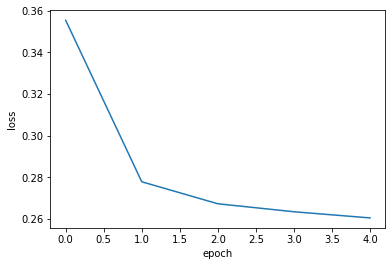

In [ ]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.show()

<h6>Evalute the model</h6>

In [ ]:
#Finally let's compare how the model performs on the test dataset
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=1)
print('The test set loss is:{0:0.4f} and the test set accuracy is:{1:0.4f}%'.format(test_loss,100*test_acc))

4/4 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5700
The test set loss is:0.2495 and the test set accuracy is:57.0000%


<h6>Make a prediction</h6>

In [ ]:
model.predict([[1,2,3,4,5]])
#print(x_test[4:5])


array([[1.5725787]], dtype=float32)

<h3>Comments</h3>
<p>tf.keras.model.compile take three important arguments</p>
<ul>
  <li>optimizer: this object specifices the training procedure. Pass it optimizer instances from the tf.train module, such as tf.train.AdamOptimizer, tf.train.RMSPropOptimizer, or tf.train.GradientDescentOptimizer</li>
  <li>loss : The function to minimize during optimization. Common choices include mean square error ( mse ), categorical_crossentropy , and binary_crossentropy . Loss
functions are specified by name or by passing a callable object from the tf.keras.losses module.
</li><li>metrics : Used to monitor training. These are string names or callables from the tf.keras.metrics module.
</li>
</ul>
<h3>Method 2 - Create the Sequential model by passing a list of layer instances to the constructor</h3>
<p>
Previously we demonstated model building using a Python list such that:
<ul><li>
Each layer of units (neurons) could be created outside the Sequential Class
</li><li>Then they could all be passed to the Sequential model as a list in a linear stack of layers.</li>
<li>When a model is created upon instantiation of the Sequential Class, this list is passed to its constructor as a list of layer instances</li>
</ul>
<p>There are several other methods to create and stack layers with tf.keras such as the .add() method. You should explore them! For the remainder of this course we the Sequential
class with layer created inside the class. This is the one of the simplest and widely used approaches to quickly create and stack the layers of artificial neurons in dense networks. Let's
use this approach to build a fully-connected network (i.e. multi-layer perceptron) feed- forward network (called a Dense Neural Network) to solve a simple binary classifcation problem.</p>
<h4>
Practice Problem 2</h4>
<p>
Build a machine learning model for binary classification that can classify colors into either red or blue based on the three RGB color channels, R (Red), G (Green), and B (Blue)
(https://www.w3schools.com/html/html_colors_rgb.asp).
</p>

In [ ]:
#create training dataset
x_train = np.array([[255,0,0],
                    [248,80,68],
                    [0,0,255],
                    [67,15,210]], dtype='float')

#create training labels
#y_train=np.array([1,1,0,0], dtype='float)
y_train=np.array([[1],[1],[0],[0]],dtype='float')

#model has an input layer and a hidden layer and output layer, each with one neuron(units)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=10,input_shape=(3,)),
  tf.keras.layers.Dense(units=1,activation='sigmoid')
])

#compile the model
learning_rate = 0.1
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

#show model architecture
model.summary()

#train the model
history=model.fit(x_train,y_train,epochs=100,verbose=0)

#classification scores of some testing data
test_set=[[248,80,68],[0,0,255]]
print('The model predicts for the two inputs', model.predict(test_set))
print('\nThe expected value are: [1] for [248,80,68] and [0.0] for [0,0,255]')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
The model predicts for the two inputs [[1.]
 [0.]]

The expected value are: [1] for [248,80,68] and [0.0] for [0,0,255]


<h4>Practice Problem 3: MNIST classification with TensorFlow and Keras!</h4>


TensorFlow Version: 2.6.0
11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.1146 - accuracy: 0.9651
[[3.0360163e-06 4.0748631e-07 1.9519133e-04 4.5826001e-04 1.8853749e-08
  4.8830484e-06 5.3094609e-09 9.9932909e-01 1.1082565e-06 8.1144244e-06]]


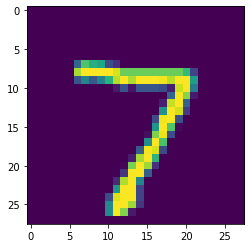

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
print('TensorFlow Version:',tf.__version__)

#get MNIST data from repo
mnist = tf.keras.datasets.mnist

#load mnist data
(images_train,labels_train),(images_test,labels_test) = mnist.load_data()

#normalize training set data
images_train, images_test = images_train /255.0, images_test /255.0
print(images_train.shape)
#create list of class names as strings
class_names = ['zero','one','two','three','four','five','six','seven','eight','nine']

#Note the input layer to the model. It consists of the image which gets flattened
# into a one-dimensional vector (array) with 784 entries representing the pixel values
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax') #gives class membership probabilities
])
model.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

model.summary()

model.fit(images_train, labels_train, epochs=1,verbose=1)

model.evaluate(images_test,labels_test)

#make prediction
print(model.predict(images_test[0].reshape(-1,28,28)))

#show image
plt.imshow(images_test[0])

In [ ]:
images_test[0].shape
images_test[0].reshape(-1,28,28)
model.predict(images_test[0].reshape(-1,28,28))

array([[3.0360163e-06, 4.0748631e-07, 1.9519133e-04, 4.5826001e-04,
        1.8853749e-08, 4.8830484e-06, 5.3094609e-09, 9.9932909e-01,
        1.1082565e-06, 8.1144244e-06]], dtype=float32)

<h2>Exercises</h2>
<br>
<h3>Exercise 1</h3>

TensorFlow Version: 2.6.0
(60000, 28, 28)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0807 - accuracy: 0.9753
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0527 - accuracy: 0.9831
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0367 - accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0264 - accuracy: 0.9915
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/st

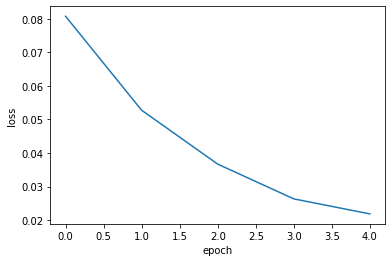

313/313 [==============================] - 1s 2ms/step - loss: 6.1921 - accuracy: 0.0069
[[1.1221747e-09 4.2938630e-10 4.4708024e-09 5.8516239e-06 5.8592494e-14
  2.8607389e-10 3.9143967e-14 9.9998903e-01 1.5706988e-09 5.0716494e-06]]


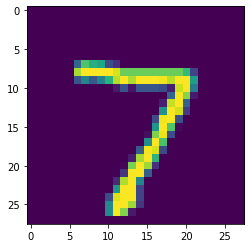

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
print('TensorFlow Version:',tf.__version__)

#get MNIST data from repo
mnist = tf.keras.datasets.mnist

#load mnist data
(images_train,labels_train),(images_test,labels_test) = mnist.load_data()

#normalize training set data
images_train, images_test = images_train /255.0, images_test /255.0
print(images_train.shape)
#create list of class names as strings
class_names = ['zero','one','two','three','four','five','six','seven','eight','nine']

#Note the input layer to the model. It consists of the image which gets flattened
# into a one-dimensional vector (array) with 784 entries representing the pixel values
cool_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512, activation='sigmoid')
])

#compile the model
cool_model.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

#model archtecture
cool_model.summary()

#training the model
history = model.fit(images_train, labels_train, epochs=5,verbose=1)

#using history to plot loss and acc
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.show()

#evaluating the model
cool_model.evaluate(images_test,labels_test)

#make prediction
print(model.predict(images_test[0].reshape(-1,28,28)))

#show image
plt.imshow(images_test[0])

<h3>Exercise 2</h3>

TensorFlow Version: 2.6.0
(60000, 28, 28)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0138 - accuracy: 0.9957
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0131 - accuracy: 0.9955
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0087 - accuracy: 0.9974
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/st

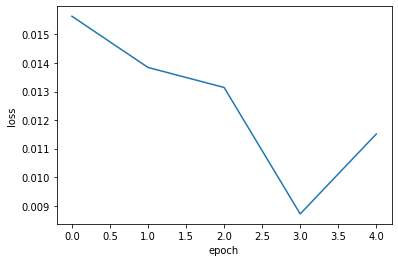

313/313 [==============================] - 1s 2ms/step - loss: 6.1701 - accuracy: 0.0021
[[4.33285526e-11 5.96415346e-14 1.01686104e-10 3.21703486e-09
  6.14176104e-18 6.69338825e-13 1.77079689e-16 1.00000000e+00
  6.71963678e-13 5.31030295e-08]]


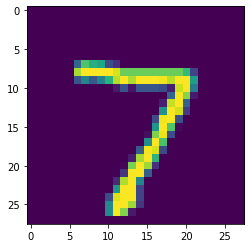

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
print('TensorFlow Version:',tf.__version__)

#get MNIST data from repo
mnist = tf.keras.datasets.mnist

#load mnist data
(images_train,labels_train),(images_test,labels_test) = mnist.load_data()

#normalize training set data
images_train, images_test = images_train /255.0, images_test /255.0
print(images_train.shape)
#create list of class names as strings
class_names = ['zero','one','two','three','four','five','six','seven','eight','nine']

#Note the input layer to the model. It consists of the image which gets flattened
# into a one-dimensional vector (array) with 784 entries representing the pixel values
cool_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512, activation='softmax')
])

#compile the model
cool_model.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

#model archtecture
cool_model.summary()

#training the model
history = model.fit(images_train, labels_train, epochs=5,verbose=1)

#using history to plot loss and acc
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.show()

#evaluating the model
cool_model.evaluate(images_test,labels_test)

#make prediction
print(model.predict(images_test[0].reshape(-1,28,28)))

#show image
plt.imshow(images_test[0])